In [3]:
# ===============================
# 🤖 IEEE-CIS Fraud Detection: Model Training & Evaluation
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


In [4]:
# -------------------------------
# 1️⃣ Load Preprocessed Data
# -------------------------------
data = pd.read_csv("outputs/cleaned_train.csv")
print("✅ Data loaded:", data.shape)

# Separate features and target
X = data.drop('isFraud', axis=1)
y = data['isFraud']

✅ Data loaded: (590540, 133)


In [5]:
# -------------------------------
# 2️⃣ Split Data
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (472432, 132), Test shape: (118108, 132)


In [6]:
# -------------------------------
# 3️⃣ Feature Scaling
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# -------------------------------
# 4️⃣ Model Initialization
# -------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced', n_jobs=-1),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=(y == 0).sum() / (y == 1).sum(),
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
}

results = []

In [8]:
# -------------------------------
# 5️⃣ Model Training & Evaluation
# -------------------------------
for name, model in models.items():
    print(f"\n🚀 Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    results.append([name, acc, prec, rec, f1, roc])

    print(f"{name} Results:")
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f} | ROC-AUC: {roc:.4f}")


🚀 Training Logistic Regression...
Logistic Regression Results:
Accuracy: 0.7590 | Precision: 0.0894 | Recall: 0.6409 | F1: 0.1569 | ROC-AUC: 0.7612

🚀 Training Random Forest...
Random Forest Results:
Accuracy: 0.8736 | Precision: 0.1592 | Recall: 0.6105 | F1: 0.2526 | ROC-AUC: 0.7939

🚀 Training XGBoost...
XGBoost Results:
Accuracy: 0.7851 | Precision: 0.1054 | Recall: 0.6864 | F1: 0.1827 | ROC-AUC: 0.8171


In [9]:

# -------------------------------
# 6️⃣ Summary Table
# -------------------------------
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "ROC-AUC"])
results_df = results_df.sort_values("ROC-AUC", ascending=False)
print("\n📊 Model Performance Summary:")
print(results_df)

results_df.to_csv("outputs/model_results.csv", index=False)
print("📁 Saved results -> outputs/model_results.csv")


📊 Model Performance Summary:
                 Model  Accuracy  Precision    Recall        F1   ROC-AUC
2              XGBoost  0.785129   0.105390  0.686426  0.182726  0.817136
1        Random Forest  0.873573   0.159230  0.610452  0.252578  0.793905
0  Logistic Regression  0.759017   0.089412  0.640939  0.156931  0.761188
📁 Saved results -> outputs/model_results.csv



🏆 Best Model: XGBoost


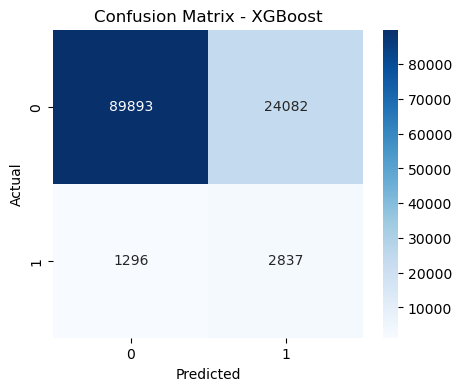

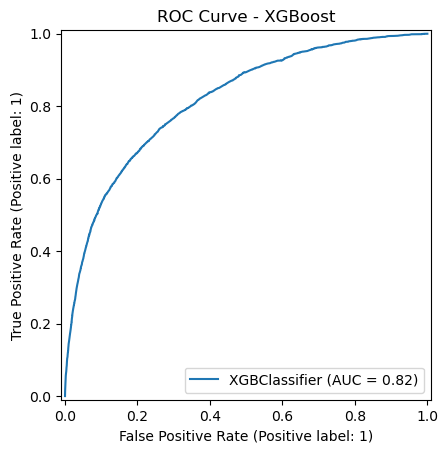


✅ Modeling phase complete.


In [10]:
# -------------------------------
# 7️⃣ Confusion Matrix & ROC Curve (Top Model)
# -------------------------------
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\n🏆 Best Model: {best_model_name}")

# Confusion matrix
y_pred_best = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(best_model, X_test_scaled, y_test)
plt.title(f"ROC Curve - {best_model_name}")
plt.show()

print("\n✅ Modeling phase complete.")